# HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left


In [115]:
import pandas as pd

In [116]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [117]:
hr_df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [118]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [119]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [120]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [121]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [122]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

### Encoding Categorical Features

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [123]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept', 'salary'] )

In [124]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [125]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept_IT                14999 non-null  uint8  
 9   dept_RandD             14999 non-null  uint8  
 10  dept_accounting        14999 non-null  uint8  
 11  dept_hr                14999 non-null  uint8  
 12  dept_management        14999 non-null  uint8  
 13  dept_marketing         14999 non-null  uint8  
 14  dept_product_mng       14999 non-null  uint8  
 15  de

### Setting X and Y Variables

In [126]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept_IT', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [127]:
X_features = list(hr_encoded_df.columns)

In [128]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [129]:
X_features.remove('left')

In [130]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [131]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [132]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [133]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [136]:
X_train.shape

(11999, 20)

In [137]:
X_test.shape

(3000, 20)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [140]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

In [141]:
logreg_v1.intercept_

array([-0.42811532])

In [142]:
logreg_v1.coef_

array([[-3.9594019 ,  0.75528911, -0.29791402,  0.00438572,  0.2661131 ,
        -1.53149685, -1.27538575, -0.1013704 , -0.48709001,  0.1298085 ,
         0.31978643, -0.42044297,  0.0228867 , -0.08612762,  0.03275214,
         0.07735152,  0.12346485, -1.1716819 ,  0.66881731,  0.11388373]])

In [143]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

{'satisfaction_level': -3.95940190020614,
 'last_evaluation': 0.7552891128006662,
 'number_project': -0.29791402323783356,
 'average_montly_hours': 0.00438571884177007,
 'time_spend_company': 0.26611309652635945,
 'Work_accident': -1.5314968480481324,
 'promotion_last_5years': -1.2753857476393087,
 'dept_IT': -0.10137040167189468,
 'dept_RandD': -0.4870900124963023,
 'dept_accounting': 0.1298084978122682,
 'dept_hr': 0.31978643415021796,
 'dept_management': -0.4204429676098763,
 'dept_marketing': 0.02288670060314157,
 'dept_product_mng': -0.08612762205322645,
 'dept_sales': 0.03275214252875378,
 'dept_support': 0.0773515202490292,
 'dept_technical': 0.1234648496201837,
 'salary_high': -1.1716819036107526,
 'salary_low': 0.6688173138608566,
 'salary_medium': 0.11388373088046588}

### Predict on Test Set

- p(y) >= 0.5,  y = 1 (L)
- p(y) < 0.5, y = 0 (NL)

In [144]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [145]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [146]:
y_logreg_v1[0:10]

,actual,predicted
10155,0,0
11688,0,0
12598,1,0
12192,1,0
8678,0,1
8217,0,0
4670,0,0
12086,1,1
5235,0,0
4189,0,0


### Evaluating the model

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.7863333333333333

### KNN Model

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn_v1 = KNeighborsClassifier(n_neighbors = 10)

In [151]:
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [152]:
knn_pred = knn_v1.predict(X_test)

In [157]:
accuracy_score(y_test, knn_pred)

0.944

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
knn_v1 = KNeighborsClassifier()

In [160]:
params = { "n_neighbors": [10, 15, 20, 25, 30],
           "weights": ['uniform', 'distance']}

In [161]:
knn_grid = GridSearchCV(knn_v1,
                        param_grid=params,
                        cv=10,
                        scoring='accuracy')

In [162]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [163]:
knn_grid.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [164]:
knn_grid.best_score_

0.9562468723936612

In [170]:
pd.DataFrame(knn_grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'n_neighbors': 10, 'weights': 'uniform'}",0.940329,6
1,"{'n_neighbors': 10, 'weights': 'distance'}",0.956247,1
2,"{'n_neighbors': 15, 'weights': 'uniform'}",0.935412,7
3,"{'n_neighbors': 15, 'weights': 'distance'}",0.954747,2
4,"{'n_neighbors': 20, 'weights': 'uniform'}",0.935412,8
5,"{'n_neighbors': 20, 'weights': 'distance'}",0.953663,3
6,"{'n_neighbors': 25, 'weights': 'uniform'}",0.931495,10
7,"{'n_neighbors': 25, 'weights': 'distance'}",0.953246,4
8,"{'n_neighbors': 30, 'weights': 'uniform'}",0.932245,9
9,"{'n_neighbors': 30, 'weights': 'distance'}",0.952746,5


In [171]:
best_knn_v2 = knn_grid.best_estimator_

### Building a Decision Tree Model

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [179]:
tree_v2.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5)

In [180]:
y_tree_pred = tree_v2.predict( X_test )

In [181]:
accuracy_score(y_test, y_tree_pred)

0.9753333333333334

In [182]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": tree_v2.feature_importances_ } )

In [183]:
features_df.sort_values("importance", ascending = False)

,features,importance
0,satisfaction_level,0.520997
4,time_spend_company,0.158379
1,last_evaluation,0.150478
2,number_project,0.102812
3,average_montly_hours,0.066148
15,dept_support,0.001089
16,dept_technical,0.000097
12,dept_marketing,0.000000
18,salary_low,0.000000
17,salary_high,0.000000


### Visualizing Decision Tree

In [184]:
from sklearn.tree import plot_tree

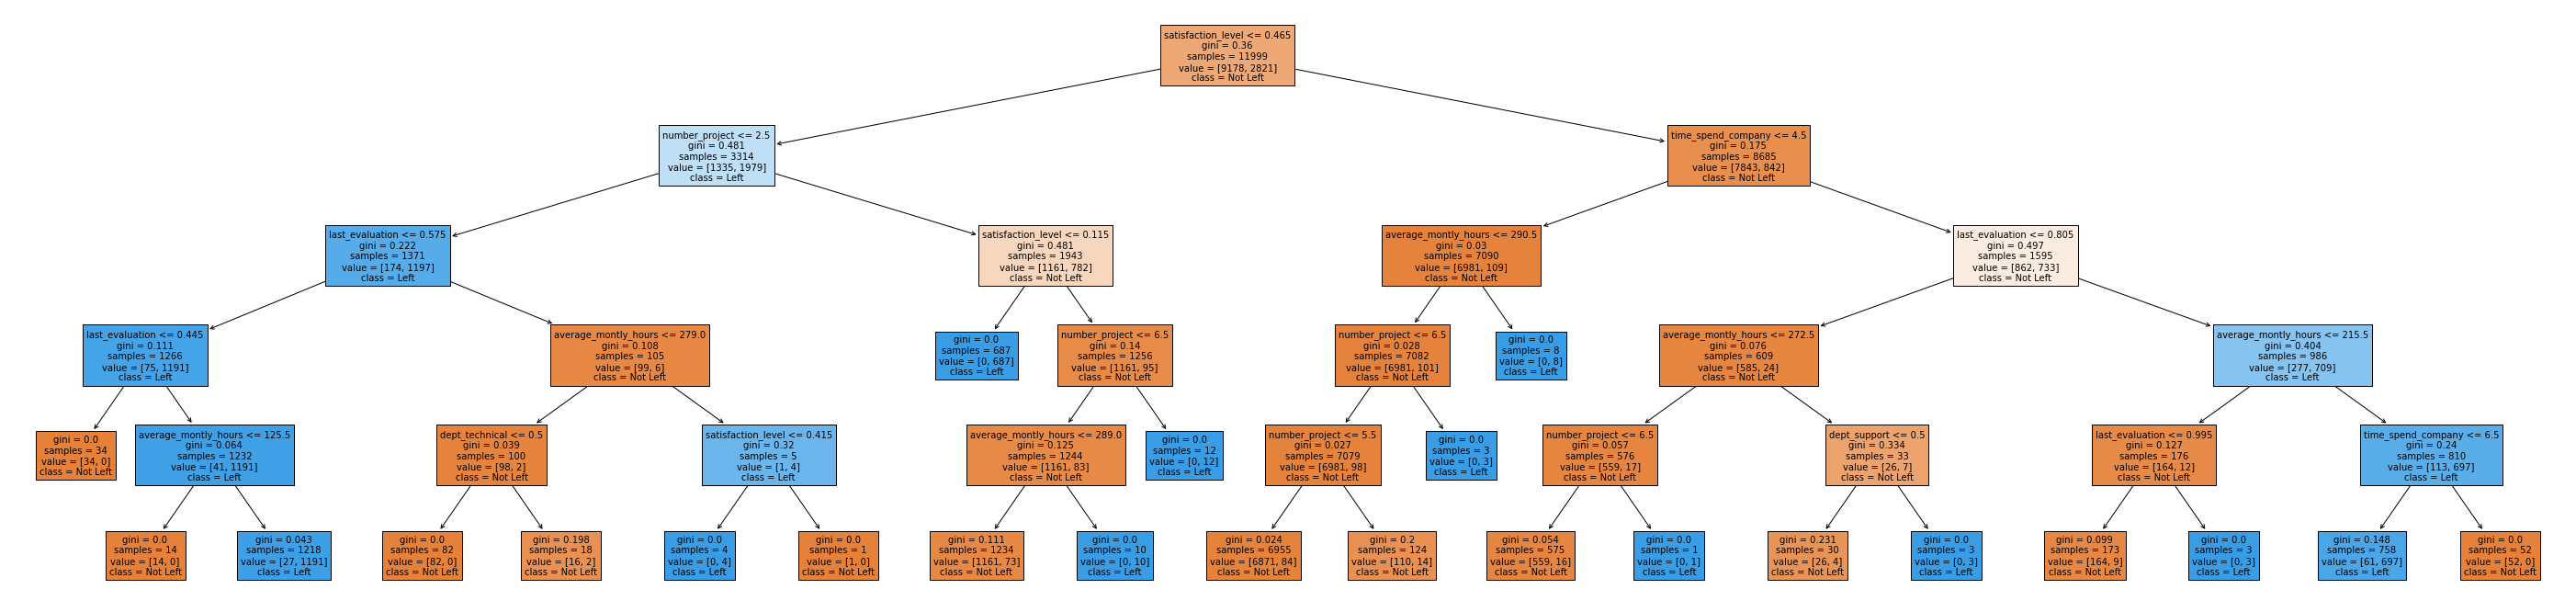

In [185]:
plt.figure(figsize = (50, 12))
plot_tree(tree_v2,
          feature_names = X_features,
          class_names = ['Not Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

In [186]:
from IPython import display

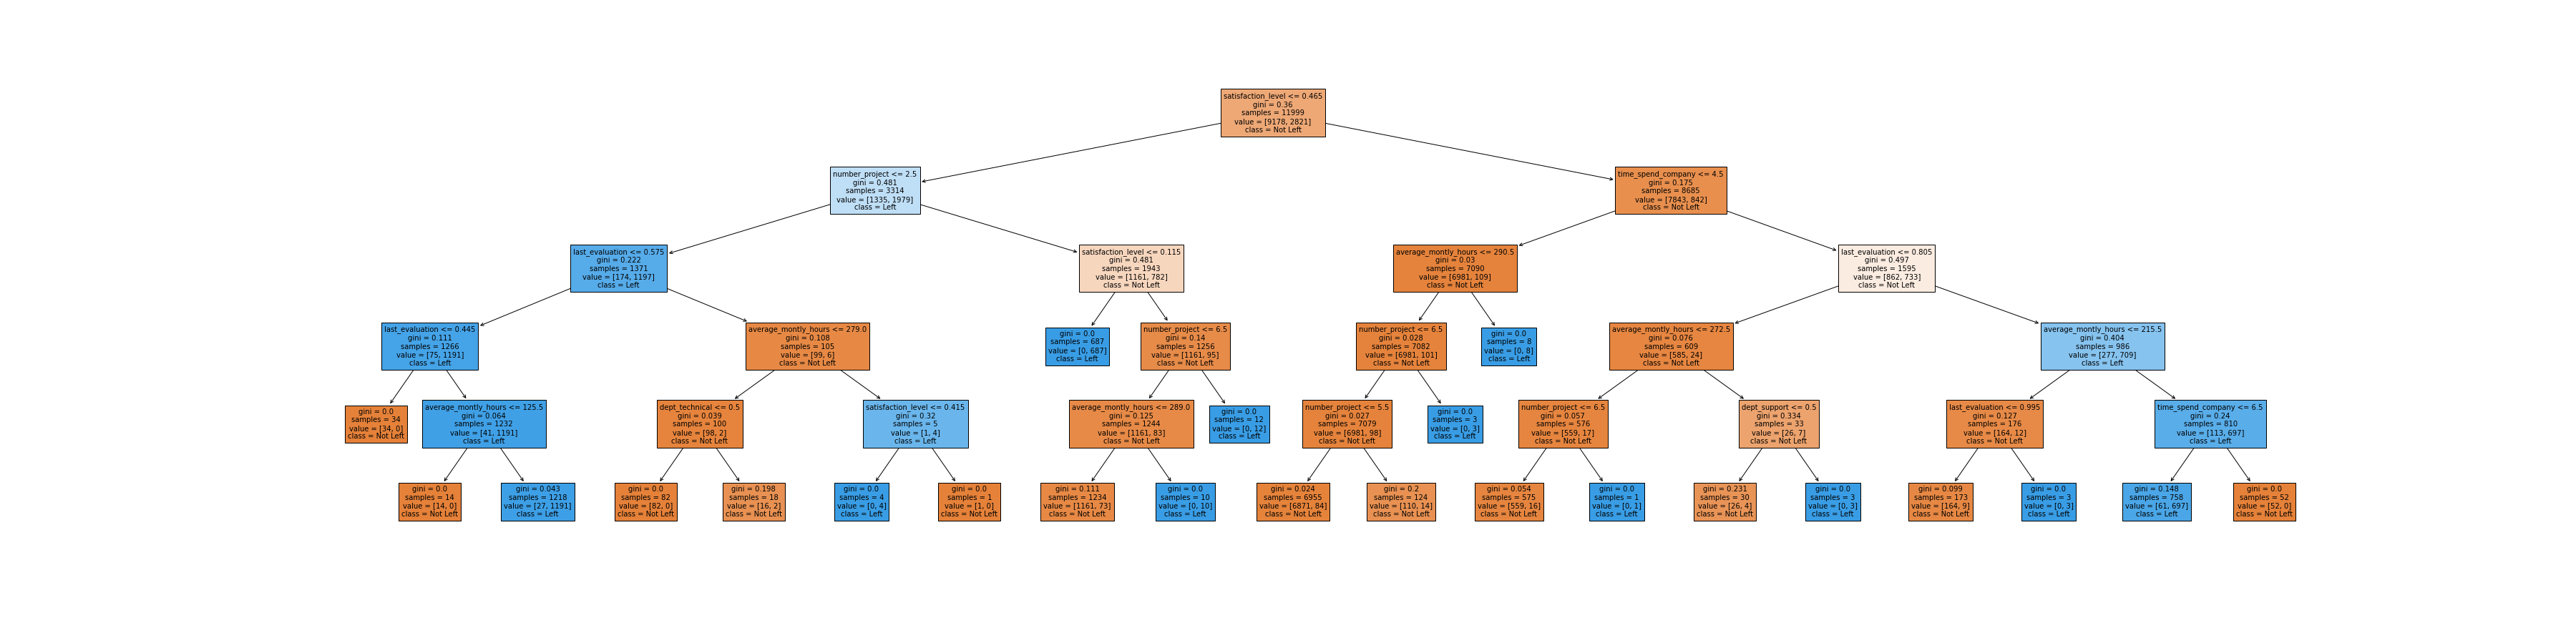

In [187]:
display.Image("tree.png")

![MY Tree](./tree.png)

### Random Forest Model

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf_v1 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 10,
                               max_features = 0.2,
                               max_samples = 0.4,
                               criterion = 'gini')

In [190]:
rf_v1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.4)

In [191]:
rf_pred_v1 = rf_v1.predict(X_test)

In [192]:
accuracy_score(y_test, rf_pred_v1)

0.9793333333333333

In [196]:
rf_v2 = RandomForestClassifier()

In [197]:
params = { 'n_estimators': [50, 100, 200],
           'max_depth': [5, 10],
           'max_features': [0.2, 0.4],
           'max_samples': [0.4, 0.6],
           'criterion': ['gini', 'entropy'] }

In [200]:
GridSearchCV?

In [201]:
rf_grid = GridSearchCV(rf_v2,
                       param_grid=params,
                       cv = 10,
                       n_jobs = -1,
                       scoring = 'accuracy')

In [202]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': [0.2, 0.4], 'max_samples': [0.4, 0.6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [203]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.4,
 'max_samples': 0.6,
 'n_estimators': 200}

In [204]:
rf_grid.best_score_

0.9806653461217684

In [205]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=0.4, max_samples=0.6,
                       n_estimators=200)

In [206]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": rf_grid.best_estimator_.feature_importances_ } )

In [207]:
features_df = features_df.sort_values('importance', ascending=False)

In [208]:
features_df['cumsum'] = features_df.importance.cumsum()

In [209]:
features_df

,features,importance,cumsum
0,satisfaction_level,0.372761,0.372761
4,time_spend_company,0.181237,0.553998
2,number_project,0.180073,0.734071
3,average_montly_hours,0.128545,0.862615
1,last_evaluation,0.116006,0.978621
5,Work_accident,0.003600,0.982221
18,salary_low,0.002959,0.985180
17,salary_high,0.002828,0.988008
16,dept_technical,0.002048,0.990056
14,dept_sales,0.001566,0.991622
